In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/IPL Matches 2008-2020.csv")

In [3]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
#Dropping irrelevant columns
df = df.drop(['id', 'date', 'player_of_match', 'umpire1', 'umpire2', 'result_margin', 'method', 'eliminator','neutral_venue'], axis=1)

In [5]:
df.head()

,city,venue,team1,team2,toss_winner,toss_decision,winner,result
0,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs
2,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets
3,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets
4,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets


In [6]:
df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [7]:
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

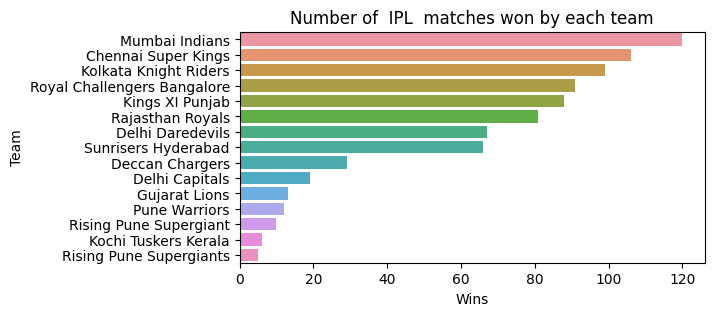

In [8]:
plt.figure(figsize = (6,3))
sns.countplot(y = 'winner',data = df,order= df['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

In [9]:
all_venues = list(df.venue.unique())

In [10]:
lst = []
for i in all_venues:
  dic = {}
  all_rows = df.loc[df['venue'] == i]
  Venue = all_rows.iloc[:,1]
  Toss_Winner = list(all_rows.iloc[:,4])
  Toss_decision = list(all_rows.iloc[:,5])
  Winner = list(all_rows.iloc[:,6])
  result = list(all_rows.iloc[:,7])
  tw = 0
  fd = 0
  bt = 0
  batting_first = 0
  fielding_first = 0
  total_matches = len(Winner)
  for j in range(0,total_matches):
    if Toss_Winner[j]==Winner[j]:
      tw = tw + 1 
      if Toss_decision[j]=='field':
        fd=fd+1
      else:
        bt = bt+1
    if result[j]=='runs':
      batting_first = batting_first + 1
    else:
      fielding_first = fielding_first + 1
  
  dic["Venue"] = i
  dic['Won'] = tw
  dic['Lost'] = len(Winner)-tw
  dic['Field'] = fd
  dic['Bat'] = bt
  dic['Batting first'] = batting_first
  dic['Fielding first'] = fielding_first
  lst.append(dic)
  tw = round((tw/total_matches)*100,2)
  fd = round((fd/(fd+bt))*100,2)
  bt = round(100-fd,2)
  batting_first = round((batting_first/total_matches)*100,2)
  fielding_first = round((fielding_first/total_matches)*100,2)
  print(i)
  txt = '{Percent}% probabilty if you win the toss, then you will win the match'.format(Percent = tw)
  print(txt)
  txt = '{Percent}% probabilty if you win the toss and chose fielding first, then you will win the match'.format(Percent = fd)
  print(txt)
  txt = '{Percent}% probabilty if you win the toss and chose batting first, then you will win the match'.format(Percent = bt)
  print(txt)
  txt = '{Percent}% probabilty if you are batting first, then you will win the match'.format(Percent = batting_first)
  print(txt)
  txt = '{Percent}% probabilty if you are fielding first, then you will win the match'.format(Percent = fielding_first)
  print(txt)
  print("")

M Chinnaswamy Stadium
53.85% probabilty if you win the toss, then you will win the match
91.43% probabilty if you win the toss and chose fielding first, then you will win the match
8.57% probabilty if you win the toss and chose batting first, then you will win the match
40.0% probabilty if you are batting first, then you will win the match
60.0% probabilty if you are fielding first, then you will win the match

Punjab Cricket Association Stadium, Mohali
45.71% probabilty if you win the toss, then you will win the match
68.75% probabilty if you win the toss and chose fielding first, then you will win the match
31.25% probabilty if you win the toss and chose batting first, then you will win the match
42.86% probabilty if you are batting first, then you will win the match
57.14% probabilty if you are fielding first, then you will win the match

Feroz Shah Kotla
51.35% probabilty if you win the toss, then you will win the match
60.53% probabilty if you win the toss and chose fielding first

In [11]:
for i in lst:
  print(i)

{'Venue': 'M Chinnaswamy Stadium', 'Won': 35, 'Lost': 30, 'Field': 32, 'Bat': 3, 'Batting first': 26, 'Fielding first': 39}
{'Venue': 'Punjab Cricket Association Stadium, Mohali', 'Won': 16, 'Lost': 19, 'Field': 11, 'Bat': 5, 'Batting first': 15, 'Fielding first': 20}
{'Venue': 'Feroz Shah Kotla', 'Won': 38, 'Lost': 36, 'Field': 23, 'Bat': 15, 'Batting first': 35, 'Fielding first': 39}
{'Venue': 'Wankhede Stadium', 'Won': 37, 'Lost': 36, 'Field': 26, 'Bat': 11, 'Batting first': 35, 'Fielding first': 38}
{'Venue': 'Eden Gardens', 'Won': 43, 'Lost': 34, 'Field': 31, 'Bat': 12, 'Batting first': 32, 'Fielding first': 45}
{'Venue': 'Sawai Mansingh Stadium', 'Won': 25, 'Lost': 22, 'Field': 19, 'Bat': 6, 'Batting first': 15, 'Fielding first': 32}
{'Venue': 'Rajiv Gandhi International Stadium, Uppal', 'Won': 21, 'Lost': 43, 'Field': 15, 'Bat': 6, 'Batting first': 28, 'Fielding first': 36}
{'Venue': 'MA Chidambaram Stadium, Chepauk', 'Won': 30, 'Lost': 27, 'Field': 8, 'Bat': 22, 'Batting first'

In [12]:
final_df = pd.DataFrame(lst)

In [13]:
final_df.head()

,Venue,Won,Lost,Field,Bat,Batting first,Fielding first
0,M Chinnaswamy Stadium,35,30,32,3,26,39
1,"Punjab Cricket Association Stadium, Mohali",16,19,11,5,15,20
2,Feroz Shah Kotla,38,36,23,15,35,39
3,Wankhede Stadium,37,36,26,11,35,38
4,Eden Gardens,43,34,31,12,32,45
